<a href="https://colab.research.google.com/github/saparbayev-azizbek-12/bi-and-ai-talents-dl/blob/main/lesson-9/lesson_9_NGram_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt

In [3]:
import torch

In [4]:
names = open('names.txt').read().splitlines()

In [ ]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(names)

32033

In [ ]:
b = {}

for name in names:
    name = ['<s>'] + list(name) + ['</s>']
    for chr1, chr2 in zip(name, name[1:]):
        bigram = (chr1, chr2)
        b[bigram] = b.get(bigram, 0) + 1

In [ ]:
len([name for name in names if name.endswith('k')])

363

In [ ]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '</s>'), 6763),
 (('a', '</s>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '</s>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '</s>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '</s>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '</s>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 147

In [ ]:
out = ''
start = '<s>'

f = {k[1]:v for k, v in b.items() if k[0] == start}
l = sorted(f.items(), key=lambda kv: -kv[1])[0][0]
out += l
start = l

f = {k[1]:v for k, v in b.items() if k[0] == start}
l = sorted(f.items(), key=lambda kv: -kv[1])[0][0]
out += l
start = l

# f = {k[1]:v for k, v in b.items() if k[0] == start}
# l = sorted(f.items(), key=lambda kv: -kv[1])[0][0]
# out += l
# start = l

out

'a</s>'

In [5]:
vocab = sorted(set(''.join(names) + '.'))

In [6]:
stoi = {v:k for k, v in enumerate(vocab)}
itos = {v:k for k, v in stoi.items()}

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# b = {}
N = torch.zeros((27, 27), dtype=torch.long)

for name in names:
    name = ['.'] + list(name) + ['.']
    for chr1, chr2 in zip(name, name[1:]):
        ix1 = stoi[chr1]
        ix2 = stoi[chr2]
        N[ix1, ix2] += 1

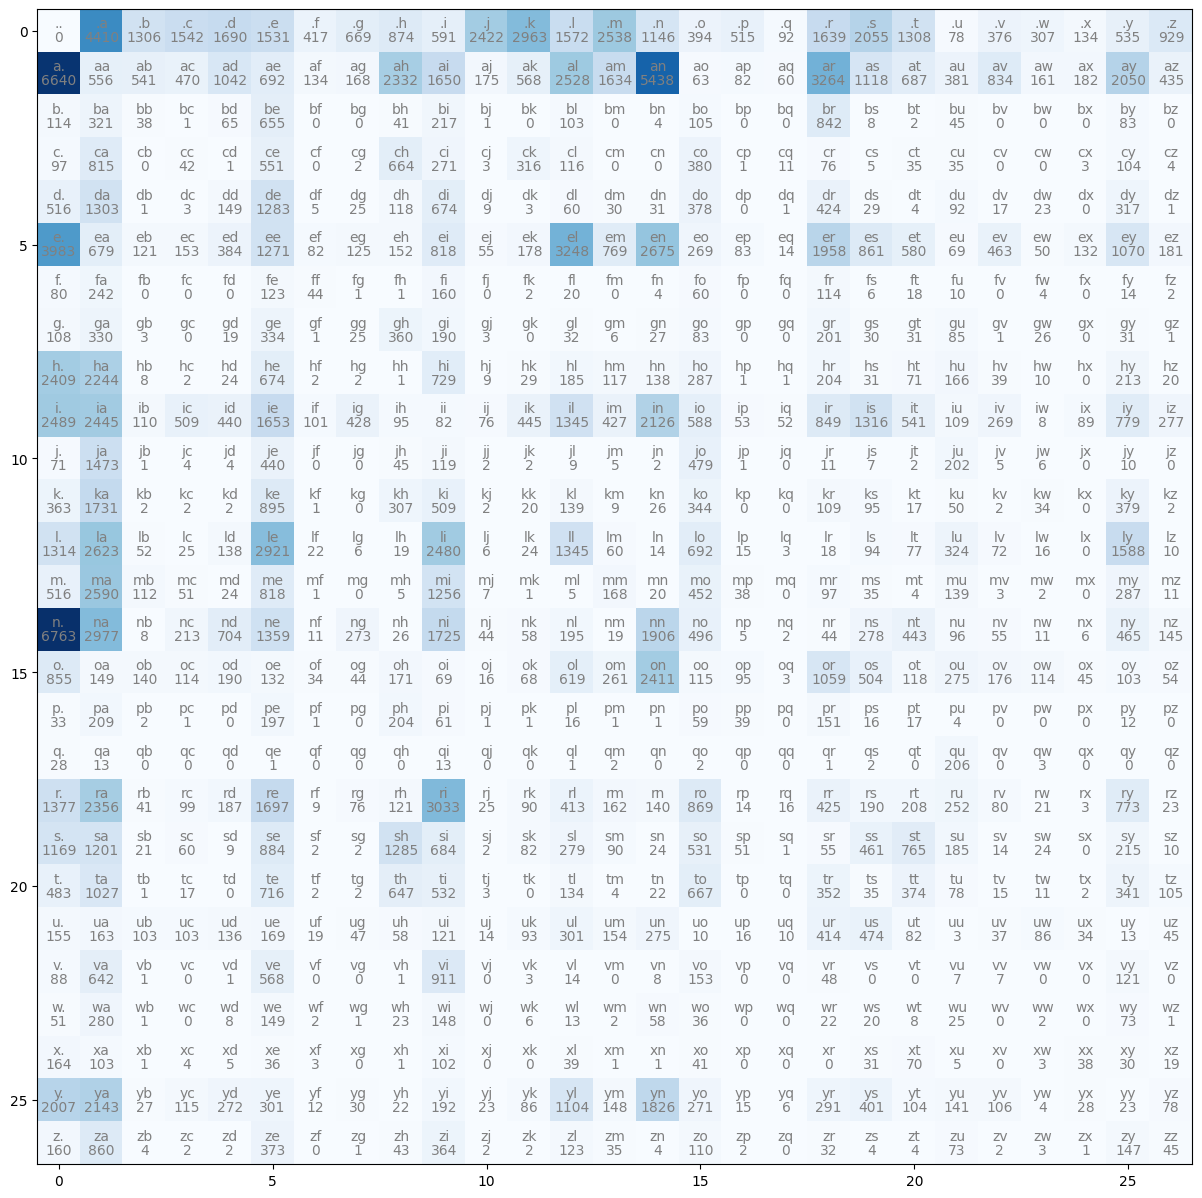

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        plt.text(j, i, itos[i] + itos[j], ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

In [ ]:
def decode(seq: list[int]) -> str:
    return ''.join([itos[i] for i in seq])

In [ ]:
P = N / N.sum(dim=1, keepdim=True)

In [ ]:
P[1]

tensor([0.1960, 0.0164, 0.0160, 0.0139, 0.0308, 0.0204, 0.0040, 0.0050, 0.0688,
        0.0487, 0.0052, 0.0168, 0.0746, 0.0482, 0.1605, 0.0019, 0.0024, 0.0018,
        0.0963, 0.0330, 0.0203, 0.0112, 0.0246, 0.0048, 0.0054, 0.0605, 0.0128])

In [ ]:
for _ in range(10):
    out = []
    ix = 0

    while True:
        p = P[ix]
        ix = torch.multinomial(p, 1, replacement=True).item()
        out.append(ix)

        if ix == 0:
            break

    print(decode(out))

rivaicemiaredo.
ma.
ly.
sseydelanan.
blya.
lalalieva.
di.
jua.
shay.
hamedienzy.


# Homework: build 3-gram model

# Unigram

In [ ]:
N1 = torch.zeros(27, dtype=torch.long)

for name in names:
  name = list(name) + ['.']
  for chr1 in name:
    ix1 = stoi[chr1]
    N1[ix1] += 1
N1

tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])

# Bigram

In [9]:
N2 = torch.zeros((27, 27), dtype=torch.long)

for name in names:
  name = ['.'] + list(name) + ['.']
  for chr1, chr2 in zip(name, name[1:]):
    ix1 = stoi[chr1]
    ix2 = stoi[chr2]
    N2[ix1, ix2] += 1
N2

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

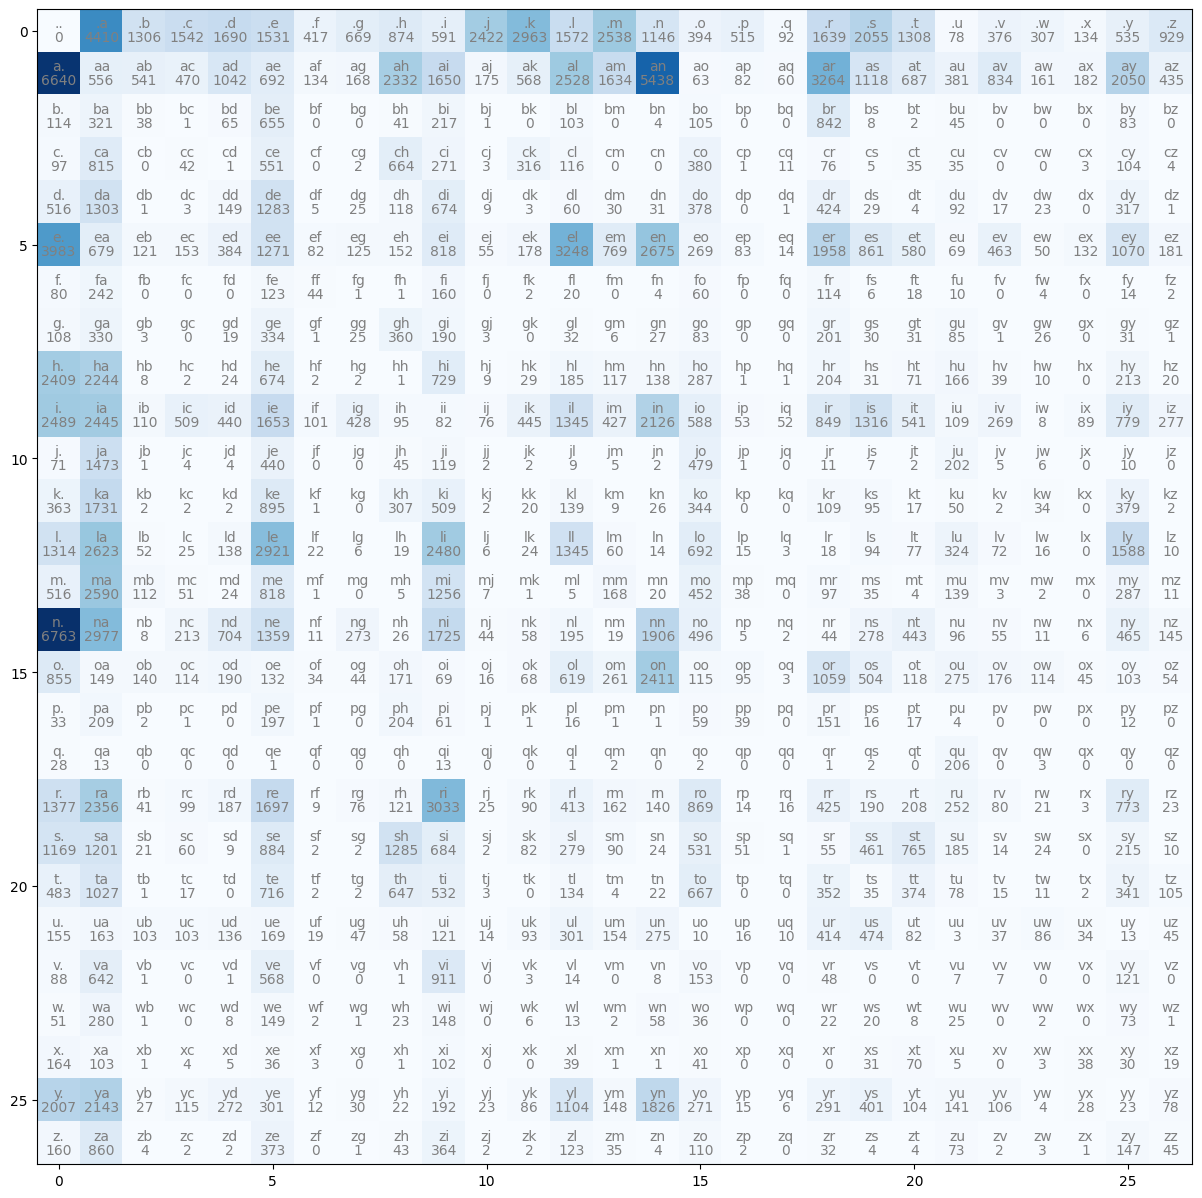

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.imshow(N2,cmap="Blues")
plt.axis("on")

for i in range(27):
  for j in range(27):
    plt.text(j, i, itos[i] + itos[j], va="bottom", ha="center", c="gray")
    plt.text(j, i, N2[i][j].item(), va="top", ha="center", c="gray")

In [10]:
P2 = N2 / N2.sum(dim=1, keepdim=True)

In [11]:
def decode(nums: list[int]) -> str:
  return ''.join([itos[i] for i in nums])

In [12]:
for _ in range(10):
    out = []
    ix = 0

    while True:
        p = P2[ix]
        ix = torch.multinomial(p, 1, replacement=True).item()
        out.append(ix)

        if ix == 0:
            break

    print(decode(out))

s.
jurikaeolaahe.
eshr.
axikannn.
arama.
jalun.
ayn.
ele.
ken.
aroniyeyldenan.


# Trigram

In [7]:
N3 = torch.zeros((27, 27, 27), dtype=torch.long)

for name in names:
  name = ['.'] + ['.'] + list(name) + ['.']
  for chr1, chr2, chr3 in zip(name, name[1:], name[2:]):
    ix1 = stoi[chr1]
    ix2 = stoi[chr2]
    ix3 = stoi[chr3]
    N3[ix1, ix2, ix3] += 1
N3

tensor([[[   0, 4410, 1306,  ...,  134,  535,  929],
         [   0,  207,  190,  ...,   27,  173,  152],
         [   0,  169,    0,  ...,    0,    4,    0],
         ...,
         [   0,   57,    0,  ...,    1,   17,   11],
         [   0,  246,    0,  ...,    0,    0,    2],
         [   0,  456,    0,  ...,    0,   91,    1]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  40,    0,    5,  ...,    0,   20,   11],
         [  36,   28,   20,  ...,    0,   12,    0],
         ...,
         [  11,    5,    0,  ...,   17,    6,    3],
         [ 163,  389,   13,  ...,    0,   16,   40],
         [  38,  123,    0,  ...,    0,   12,   22]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  46,    5,    5,  ...,    4,   31,    4],
         [   1,    8,    0,  ...,    0,    9,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  55,    4,    1,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [13]:
P3 = N3 / N3.sum(dim=2, keepdim=True)

In [26]:
for _ in range(10):
    out = []
    ix1 = 0
    ix2 = 0


    while True:
        p = P3[ix1, ix2]
        ix3 = torch.multinomial(p, 1, replacement=True).item()
        out.append(ix3)
        ix1, ix2 = ix2, ix3

        if ix3 == 0:
            break

    print(decode(out))

sington.
ralila.
chrie.
karciemmiquinameliah.
alyneulivaly.
ja.
jere.
terle.
sa.
tyn.


#4-gram

In [27]:
N4 = torch.zeros((27, 27, 27, 27), dtype=torch.long)

for name in names:
  name = ['.'] * 3 + list(name) + ['.']
  for chr1, chr2, chr3, chr4 in zip(name, name[1:], name[2:], name[3:]):
    ix1 = stoi[chr1]
    ix2 = stoi[chr2]
    ix3 = stoi[chr3]
    ix4 = stoi[chr4]
    N4[ix1, ix2, ix3, ix4] += 1
N4

tensor([[[[   0, 4410, 1306,  ...,  134,  535,  929],
          [   0,  207,  190,  ...,   27,  173,  152],
          [   0,  169,    0,  ...,    0,    4,    0],
          ...,
          [   0,   57,    0,  ...,    1,   17,   11],
          [   0,  246,    0,  ...,    0,    0,    2],
          [   0,  456,    0,  ...,    0,   91,    1]],

         [[   0,    0,    0,  ...,    0,    0,    0],
          [   0,    0,    5,  ...,    0,   12,    1],
          [   0,    6,   14,  ...,    0,    4,    0],
          ...,
          [   0,    2,    0,  ...,    2,    1,    1],
          [   0,   28,    1,  ...,    0,    3,    7],
          [   0,   69,    0,  ...,    0,    7,    4]],

         [[   0,    0,    0,  ...,    0,    0,    0],
          [   0,    1,    5,  ...,    4,   30,    1],
          [   0,    0,    0,  ...,    0,    0,    0],
          ...,
          [   0,    0,    0,  ...,    0,    0,    0],
          [   0,    1,    0,  ...,    0,    0,    0],
          [   0,    0,    0,  ...

In [28]:
P4 = N4 / N4.sum(dim=3, keepdim=True)

In [30]:
for _ in range(10):
    out = []
    ix1 = 0
    ix2 = 0
    ix3 = 0


    while True:
        p = P4[ix1, ix2, ix3]
        ix4 = torch.multinomial(p, 1, replacement=True).item()
        out.append(ix4)
        ix1, ix2, ix3 = ix2, ix3, ix4

        if ix4 == 0:
            break

    print(decode(out))

aya.
abdirah.
markiell.
kasheelarkiemadderyanci.
quice.
sofiago.
jaska.
kartikela.
aryelynne.
alp.
